#Import

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [110]:
import os
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, BatchNormalization
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.transform import resize
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#Extract data from video

### Extract frame from video

In [ ]:
data_folder = '/content/drive/MyDrive/Video'
#return a list of video paths
def load_path(data_folder):
  file_path = []

  for filename in os.listdir(data_folder):
    if filename.endswith('mp4'):
      path = os.path.join(data_folder, filename)
      file_path.append(path)
      print(path)
  return file_path

In [ ]:
data_path_list = load_path(data_folder)

/content/drive/MyDrive/Video/Tuấn.mp4
/content/drive/MyDrive/Video/Trường.mp4
/content/drive/MyDrive/Video/Linh.mp4
/content/drive/MyDrive/Video/Hiếu.mp4
/content/drive/MyDrive/Video/Quân.mp4
/content/drive/MyDrive/Video/Xuân Anh.mp4
/content/drive/MyDrive/Video/Tân.mp4
/content/drive/MyDrive/Video/Đức.mp4
/content/drive/MyDrive/Video/Kiên.mp4
/content/drive/MyDrive/Video/Việt Đức.mp4
/content/drive/MyDrive/Video/Hùng.mp4
/content/drive/MyDrive/Video/Thắng.mp4
/content/drive/MyDrive/Video/Vân.mp4
/content/drive/MyDrive/Video/HĐức.mp4


In [ ]:
len('/content/drive/MyDrive/Video/')

29

In [ ]:
save_frame_folder = '/content/drive/MyDrive/AI4E_Data/Coursework2Data'
#extract frame only
def extract_frame(vid_path):
  #extract name
  len_path = len(vid_path)
  name = vid_path[29:len_path-4]
  print('Start extracting frames of ',name)
  vidcap = cv2.VideoCapture(vid_path)
  success, image = vidcap.read()
  count =0

  while success:
    save_path = os.path.join(save_frame_folder,name)
    print(save_path +'%d.jpg' %count)
    cv2.imwrite(save_path +'%d.jpg' %count, image)
    success, image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1

In [ ]:
#read frame from video and save them
for vid_path in data_path_list:
  extract_frame(vid_path)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên321.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên322.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên323.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên324.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên325.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên326.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên327.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên328.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên329.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên330.jpg
Read a new frame:  True
/content/drive/MyDrive/AI4E_Data/Coursework2Data/Kiên331.j

In [ ]:
#check length of data
data_name_list = []

for filename in os.listdir(save_frame_folder):
    if filename.endswith('jpg'):
      data_name_list.append(filename)
len(data_name_list)

7360

### Extract face image from frames

In [ ]:
#detecting face and crop them, then save in specific folder
face_detect_folder = '/content/drive/MyDrive/AI4E_Data/FaceDetectionData'

#input la image path hoac image da duoc read by cv2
def crop_face_image(image_path):
  detector = MTCNN()
  # if type(image_path) == str:
  #   img = cv2.imread(image_path)
  # else:
  #   img = image_path
  img = cv2.imread(image_path)
  data = detector.detect_faces(img)
  #in case we detected multiple faces, then choose the biggest one
  biggest = 0
  if data != []:
    for faces in data:
      box = faces['box']
      #calculate the are in the image
      #box[0] =x, box[1] = y, box[2] = width, box[3] = height
      #but (x,y) here is center point or upper left point?
      #i think its upper left point
      area = box[3] *box[2]
      if area > biggest:
        biggest = area
        bbox = box
    bbox[0] = 0 if bbox[0] < 0 else bbox[0]
    bbox[1] = 0 if bbox[1] < 0 else bbox[1]
    img = img[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2]]
    #convert from bgr to rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return (True, img)
  else:
    return (False, None)

<Figure size 432x288 with 0 Axes>

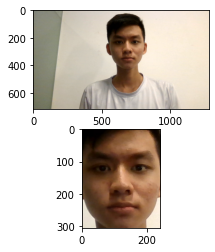

In [ ]:
#test crop image
img_path = '/content/drive/MyDrive/AI4E_Data/Coursework2Data/Đức0.jpg'
status, image = crop_face_image(img_path)
if status:
  plt.figure()
  f, axarr = plt.subplots(2,1) 
  orig_img = plt.imread(img_path)
  axarr[0].imshow(orig_img)
  axarr[1].imshow(image)

  plt.imshow(image)
  bgr_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  cv2.imwrite(face_detect_folder +'/test4.jpg', bgr_img)
else:
  print('No facial image was detected')

In [ ]:
#extract face from frame the save to face_detect_folder
def face_detect_save(save_frame_folder, save_detect_folder):
  for filename in os.listdir(save_frame_folder):
    if filename.endswith('jpg'):
      # #extract name without .jpg
      # name_wo_mp4 = file_path[:len(filename) - 4]

      # #extract person name
      # pattern = r'[0-9]'
      # name = re.sub(pattern, '', filename)

      # #extract file number
      # num = re.findall('[0-9]+', filename)

      img_path = os.path.join(save_frame_folder, filename)
      status, image = crop_face_image(img_path)
      if status:
        bgr_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(save_detect_folder + '/' + filename, bgr_img)
        print('Saving ', filename)
      else:
        print('No facial image was detected')

In [ ]:
#take image from save_frame_folder and detect face then save to face_detect_folder
face_detect_save(save_frame_folder,face_detect_folder)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Saving  Quân537.jpg
Saving  Quân538.jpg
Saving  Quân539.jpg
Saving  Quân540.jpg
Saving  Quân541.jpg
Saving  Quân542.jpg
Saving  Quân543.jpg
Saving  Quân544.jpg
Saving  Quân545.jpg
Saving  Quân546.jpg
Saving  Quân547.jpg
Saving  Quân548.jpg
Saving  Quân549.jpg
Saving  Quân550.jpg
Saving  Quân551.jpg
Saving  Quân552.jpg
Saving  Quân553.jpg
Saving  Quân554.jpg
Saving  Quân555.jpg
Saving  Quân556.jpg
Saving  Quân557.jpg
Saving  Quân558.jpg
Saving  Quân559.jpg
Saving  Quân560.jpg
Saving  Quân561.jpg
Saving  Quân562.jpg
Saving  Quân563.jpg
Saving  Quân564.jpg
Saving  Quân565.jpg
Saving  Quân566.jpg
No facial image was detected
No facial image was detected
No facial image was detected
No facial image was detected
No facial image was detected
No facial image was detected
No facial image was detected
Saving  Quân574.jpg
Saving  Quân575.jpg
No facial image was detected
No facial image was detected
No facial 

# Preprocessing data

###Load data

In [22]:
#Folder that contains face_extracted images
face_detect_folder = '/content/drive/MyDrive/AI4E_Data/FaceDetectionData'

X_data = []
Y_data = []

# stop = 0
for filename in os.listdir(face_detect_folder):
    # if(stop == 10):
    #   break
    if filename.endswith('jpg'):
      image = plt.imread(os.path.join(face_detect_folder,filename))
      X_data.append(image)
      #extract name without .jpg
      name_wo_mp4 = filename[:len(filename) - 4]

      #extract person name
      pattern = r'[0-9]'
      name = re.sub(pattern, '', name_wo_mp4)
      #xoa space
      name.replace(" ", "")
      Y_data.append(name)
      stop += 1

len(X_data)

5748

###Processing

In [49]:
#chia train/val/test
X_np_data = np.array(X_data)
Y_np_data = np.array(Y_data)

X_train, X_val, y_train, y_val = train_test_split(X_np_data, Y_np_data, test_size=0.2, stratify =Y_np_data)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify =y_val)

print(len(X_train))
print(len(X_val))
print(len(X_test))


4598
575
575


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


Hùng


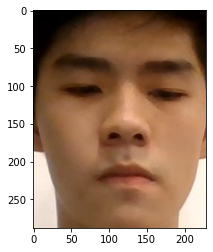

In [56]:
#test split data
num = 12
plt.imshow(X_val[num])
print(y_val[num])

In [85]:
#resize image to fit input of pretrain model
def resize_image(X):
  res = []
  for i in range(len(X)):
    res.append(cv2.resize(X[i],(160,160),interpolation = cv2.INTER_AREA))
  res = np.array(res)
  return res

In [86]:
X_train_resize = resize_image(X_train)
X_val_resize = resize_image(X_val)
X_test_resize = resize_image(X_test)

In [99]:
#Normalize to range (0,1)
X_train_norm = X_train_resize/255.
X_val_norm = X_val_resize/255.
X_test_norm = X_test_resize/255.

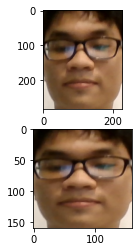

In [101]:
#test thu
no_test = 182
f, axarr = plt.subplots(2,1) 
axarr[0].imshow(X_val[no_test])
axarr[1].imshow(X_val_norm[no_test])

In [102]:
print(X_train_norm.shape)
print(X_val_norm.shape)
print(X_test_norm.shape)

(4598, 160, 160, 3)
(575, 160, 160, 3)
(575, 160, 160, 3)


In [62]:
#Encode y
le = preprocessing.LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.fit_transform(y_val)
y_test_le = le.fit_transform(y_test)

In [67]:
# One-hot encoding
lb = preprocessing.LabelBinarizer()
y_train_lb = lb.fit_transform(y_train_le)
y_val_lb = lb.fit_transform(y_val_le)
y_test_lb = lb.fit_transform(y_test_le)

In [163]:
name_map ={}
for i in range(14):
  for j in range(len(y_test_le)):
    if y_test_le[j] == i:
      print(y_test[j])
      print(y_test_le[j])
      name_map[y_test_le[j]] = y_test[j]
      break
print(name_map)

Hiếu
0
Hùng
1
HĐức
2
Kiên
3
Linh
4
Quân
5
Tân
6
Thắng
7
Trường
8
Tuấn
9
Vân
10
Việt Đức
11
Xuân Anh
12
Đức
13
{0: 'Hiếu', 1: 'Hùng', 2: 'HĐức', 3: 'Kiên', 4: 'Linh', 5: 'Quân', 6: 'Tân', 7: 'Thắng', 8: 'Trường', 9: 'Tuấn', 10: 'Vân', 11: 'Việt Đức', 12: 'Xuân Anh', 13: 'Đức'}


In [72]:
print(y_train_lb.shape)
print(y_val_lb.shape)
print(y_test_lb.shape)

(4598, 14)
(575, 14)
(575, 14)


#Training

In [42]:
#Load pretrained model and weight
#Using Facenet
model_path = '/content/drive/MyDrive/keras-facenet/model/facenet_keras.h5'
weight_path = '/content/drive/MyDrive/keras-facenet/weights/facenet_keras_weights.h5' 
facenet = load_model(model_path)
facenet.load_weights(weight_path)

In [43]:
facenet.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [107]:
num_class = y_train_lb.shape[1]
model = Sequential()
model.add(facenet)
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

for layer in facenet.layers:
    layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v1 (Functio (None, 128)               22808144  
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 14)                1806      
Total params: 22,875,870
Trainable params: 67,726
Non-trainable params: 22,808,144
_________________________________________________________________


In [108]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [109]:
save_dir = '/content/drive/MyDrive/AI4E_Data'
model_name = 'cw2model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name) 

In [111]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

es = es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

callbacks = [checkpoint, es]

In [112]:
H = model.fit(X_train_norm, y_train_lb, validation_data=(X_val_norm, y_val_lb),
          batch_size=128, epochs=100, verbose=1,
          callbacks=callbacks)

Epoch 1/100
Cause: could not parse the source code of <function <lambda> at 0x7f62bae80e60>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f62bae80e60>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f62bae80a70>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f62bae80a70>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f62bae80c20>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cau

KeyboardInterrupt: ignored

In [135]:
score = model.evaluate(X_test_norm, y_test_lb)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

18/18 [==============================] - 29s 2s/step - loss: 0.0200 - accuracy: 0.9930
Test loss: 0.0200
Test accuracy: 0.9930


In [137]:
pred = model.predict(X_test_norm)

In [166]:
#take a list of wrong prediction image 'indexes
wrong_pred_index =[]
for i in range(len(pred)):
  if np.argmax(pred[i])  != y_test_le[i] :
      wrong_pred_index.append(i)
print(len(wrong_pred_index))

4


<Figure size 432x288 with 0 Axes>

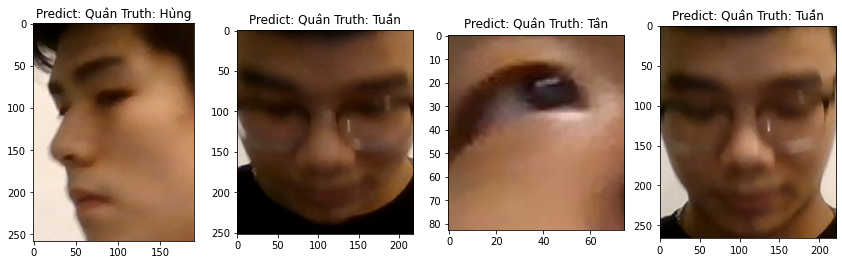

In [181]:
plt.figure()
w = len
f, axarr = plt.subplots(1,4) 
plt.subplots_adjust(right = 2)
for i, index in enumerate(wrong_pred_index):
  axarr[i].imshow(X_test[index])
  title = 'Predict: ' + name_map[np.argmax(pred[index])] + ' Truth: ' + y_test[index]
  axarr[i].set_title(title)
  


Predict:  Hiếu
Truth:  Hiếu


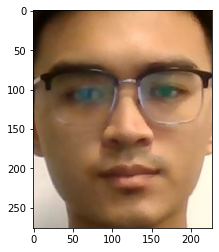

In [193]:
no_test = 60
print('Predict: ',name_map[np.argmax(pred[no_test])])
print('Truth: ',y_test[no_test])
plt.imshow(X_test[no_test])

<Figure size 432x288 with 0 Axes>

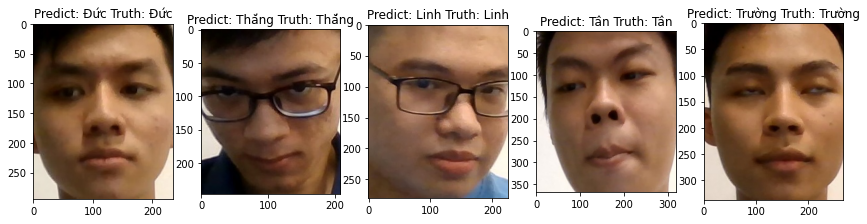

In [183]:

pred_list_index = np.random.randint(len(y_test),size= 5)

plt.figure()
w = len
f, axarr = plt.subplots(1,5) 
plt.subplots_adjust(right = 2)
for i, index in enumerate(pred_list_index):
  axarr[i].imshow(X_test[index])
  title = 'Predict: ' + name_map[np.argmax(pred[index])] + ' Truth: ' + y_test[index]
  axarr[i].set_title(title)
  

#Prediction

In [194]:
#Load model
model_path = '/content/drive/MyDrive/AI4E_Data/cw2model.h5'
model = load_model(model_path)

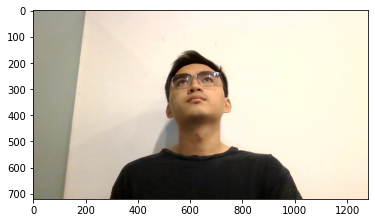

In [195]:
#Load image
img_path = '/content/drive/MyDrive/AI4E_Data/Coursework2Data/Hiếu103.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [197]:
#extract face from image
def crop_face_image(image_path):
  detector = MTCNN()
  # if type(image_path) == str:
  #   img = cv2.imread(image_path)
  # else:
  #   img = image_path
  img = cv2.imread(image_path)
  data = detector.detect_faces(img)
  #in case we detected multiple faces, then choose the biggest one
  biggest = 0
  if data != []:
    for faces in data:
      box = faces['box']
      #calculate the are in the image
      #box[0] =x, box[1] = y, box[2] = width, box[3] = height
      #but (x,y) here is center point or upper left point?
      #i think its upper left point
      area = box[3] *box[2]
      if area > biggest:
        biggest = area
        bbox = box
    bbox[0] = 0 if bbox[0] < 0 else bbox[0]
    bbox[1] = 0 if bbox[1] < 0 else bbox[1]
    img = img[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2]]
    #convert from bgr to rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return (True, img)
  else:
    return (False, None)

<Figure size 432x288 with 0 Axes>

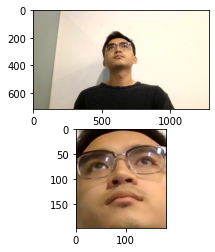

In [204]:
#Extract face from image
status, image = crop_face_image(img_path)
if status:
  plt.figure()
  f, axarr = plt.subplots(2,1) 
  orig_img = plt.imread(img_path)
  axarr[0].imshow(orig_img)
  axarr[1].imshow(image)

  plt.imshow(image)
else:
  print('No facial image was detected')

In [205]:
#Preprocess Image
image = cv2.resize(image,(160,160),interpolation = cv2.INTER_AREA)
image = image/255.

In [206]:
#Load name_map
name_map ={0: 'Hiếu', 1: 'Hùng', 2: 'HĐức', 3: 'Kiên', 4: 'Linh', 5: 'Quân', 6: 'Tân', 7: 'Thắng', 8: 'Trường', 9: 'Tuấn', 10: 'Vân', 11: 'Việt Đức', 12: 'Xuân Anh', 13: 'Đức'}

Predict:  Hiếu
Truth:  Hieu


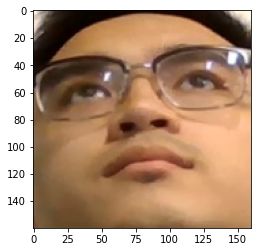

In [207]:
#Predict
#Write the true name
true_name='Hieu'
#Expand dims to have valid shape for keras model prediction
image_exdim = np.expand_dims(image, axis =0)
name_pred = model.predict(image_exdim)

print('Predict: ',name_map[np.argmax(name_pred[0])])
print('Truth: ',true_name)
plt.imshow(image)